In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
%matplotlib inline

#for linux use this
#RUTA_DATOS = '../datos_navent_fiuba/'
#and for windows use this
RUTA_DATOS = 'datos_navent_fiuba/'

In [2]:
#se cargan los datos
postulantes_educacion = pd.read_csv(RUTA_DATOS + 'fiuba_1_postulantes_educacion.csv')
pos_gen_edad = pd.read_csv(RUTA_DATOS + 'fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv(RUTA_DATOS + 'fiuba_3_vistas.csv')
postulaciones = pd.read_csv(RUTA_DATOS + 'fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv(RUTA_DATOS + 'fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv(RUTA_DATOS + 'fiuba_6_avisos_detalle.csv')


### Visualizacion inicial de los dataframes
Se procede a ver cada uno de los dataframes cargados junto con alguna de sus caracteriticas para analisar cual es la información que disponemos como punto de partida.

#### Postulantes_educacion

In [16]:
postulantes_educacion.head(5)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


Podemos observar que tenemos ids de los postulantes y el nombre y el estado de su respectivo nivel educativo.

In [4]:
postulantes_educacion.shape

(298231, 3)

In [5]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [6]:
postulantes_educacion['nombre'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: nombre, dtype: int64

In [7]:
postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [17]:
#se observa que nombre y estado son valores categoricos

postulantes_educacion['estado'] = postulantes_educacion['estado'].astype('category')
postulantes_educacion['nombre'] = postulantes_educacion['nombre'].astype('category')

In [18]:
pd.crosstab(postulantes_educacion.nombre, postulantes_educacion.estado)

estado,Abandonado,En Curso,Graduado
nombre,,,
Doctorado,15,94,105
Master,144,1519,1935
Otro,947,4919,18882
Posgrado,317,2239,4831
Secundario,3156,3995,103105
Terciario/Técnico,5692,15032,27009
Universitario,14955,50733,38607


[Text(0,0,'Doctorado'),
 Text(0,0,'Master'),
 Text(0,0,'Otro'),
 Text(0,0,'Posgrado'),
 Text(0,0,'Secundario'),
 Text(0,0,'Terciario/Técnico'),
 Text(0,0,'Universitario')]

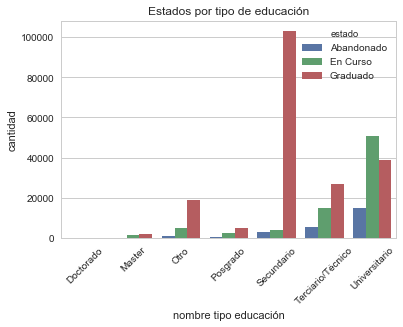

In [19]:
g = sns.countplot(x= 'nombre', hue= 'estado', data = postulantes_educacion)
g.set_title('Estados por tipo de educación')
g.set_xlabel('nombre tipo educación')
g.set_ylabel('cantidad')
g.set_xticklabels(g.get_xticklabels(), rotation = 45)

#### Postulantes_gen_y_edad

In [20]:
pos_gen_edad.head(5)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


Podemos observar que tenemos ids de los postulantes, su fecha de nacimiento y su respectivo genero.

In [10]:
pos_gen_edad.shape

(200888, 3)

Podemos observar que la cantidad de postulantes sobre la que se tiene esta información (200888) es menor a la que se tiene el nivel educativo (298231).

In [21]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [22]:
pos_gen_edad['fechanacimiento'].head()
#observamos el formato en el que se encuentran las fechas.

0    1970-12-03
1    1962-12-04
2    1978-08-10
3    1969-05-09
4    1981-02-16
Name: fechanacimiento, dtype: object

In [23]:
pos_gen_edad = pos_gen_edad[~(pos_gen_edad['fechanacimiento'].isnull())]

In [113]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196138 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196138 non-null object
fechanacimiento    196138 non-null object
sexo               196138 non-null object
dtypes: object(3)
memory usage: 6.0+ MB


Existen postulantes sobre los que no tenemos información de su edad

In [24]:
#se observa que sexo son valores categoricos y fechanacimiento fechas

pos_gen_edad['fechanacimiento'] = pd.to_datetime(pos_gen_edad['fechanacimiento'], errors = 'coerce', format= '%Y-%m-%d')
pos_gen_edad['sexo'] = pos_gen_edad['sexo'].astype('category')

In [25]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196138 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196138 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196138 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.7+ MB


Vemos que existian 7 datos (196138-196131) que tenian fechas de nacimiento en formato incorrecto.

In [26]:
pos_gen_edad = pos_gen_edad[~(pos_gen_edad['fechanacimiento'].isnull())]

In [27]:
pos_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196131 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196131 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196131 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.7+ MB


In [28]:
pos_gen_edad['sexo'].value_counts()

FEM           101674
MASC           94013
NO_DECLARA       444
Name: sexo, dtype: int64

La cantidad de datos acerca de hombres y mujeres que poseemos es aproximadamente la misma.

/home/iglesias/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Text(0,0.5,'cantidad de postulantes')

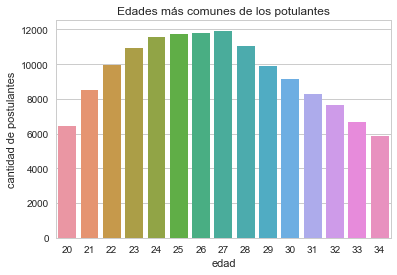

In [29]:
edades = (2018- pos_gen_edad['fechanacimiento'].dt.year).value_counts()[:15]
g = sns.barplot(x= edades.index, y=edades.values, orient= 'v')
g.set_title('Edades más comunes de los potulantes')
g.set_xlabel('edad')
g.set_ylabel('cantidad de postulantes')

#### Vistas

In [30]:
vistas.tail(5)

,idAviso,timestamp,idpostulante
961892,1112366944,2018-02-28T23:59:08.772-0500,MVPj3AK
961893,1001442844,2018-02-28T23:59:37.000-0500,VNrYP6m
961894,1112362644,2018-02-28T23:59:46.181-0500,owzLD43
961895,1112305277,2018-02-28T23:59:52.754-0500,A3DraY1
961896,1112345900,2018-02-28T23:59:55.409-0500,ekmNzBW


Aquí encontramos las vistas que tuvo un aviso idAviso por el postulante idpostulante

In [50]:
vistas.shape

(961897, 3)

In [51]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [31]:
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'], errors = 'coerce', format = "%Y-%m-%dT%H:%M:%S.%f-0500")

In [32]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null datetime64[ns]
idpostulante    961897 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.0+ MB


In [33]:
vistas.tail()

,idAviso,timestamp,idpostulante
961892,1112366944,2018-02-28 23:59:08.772,MVPj3AK
961893,1001442844,2018-02-28 23:59:37.000,VNrYP6m
961894,1112362644,2018-02-28 23:59:46.181,owzLD43
961895,1112305277,2018-02-28 23:59:52.754,A3DraY1
961896,1112345900,2018-02-28 23:59:55.409,ekmNzBW


Text(0,0.5,'Cantidad de vistas')

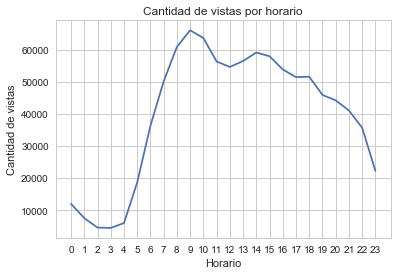

In [34]:
horarios = vistas['timestamp'].dt.hour.value_counts().sort_index()
g = horarios.plot(xticks= range(0,24))
g.set_title('Cantidad de vistas por horario')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de vistas')

[Text(0,0,'Lunes'),
 Text(0,0,'Martes'),
 Text(0,0,'Miercoles'),
 Text(0,0,'Jueves'),
 Text(0,0,'Viernes'),
 Text(0,0,'Sabado')]

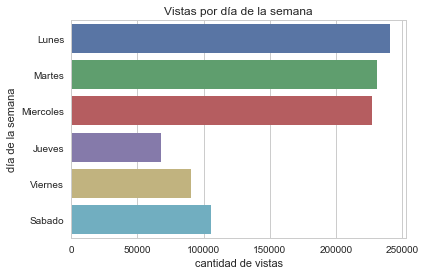

In [35]:
weekdays = vistas['timestamp'].map(lambda x: x.weekday()).value_counts()
g = sns.barplot(x= weekdays.values, y= weekdays.index, orient ='h')
g.set_title('Vistas por día de la semana')
g.set_xlabel('cantidad de vistas')
g.set_ylabel('día de la semana')
g.set_yticklabels(('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'))

#### Postulaciones

In [36]:
postulaciones.head(5)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [37]:
postulaciones.shape

(3401623, 3)

In [38]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [39]:
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'],errors = 'coerce', format = "%Y-%m-%d %H:%M:%S")

In [40]:
#promedio de postulaciones por usuario
postulantes = postulaciones['idpostulante'].value_counts()
postulantes.describe()

count    200888.000000
mean         16.932933
std          31.267385
min           1.000000
25%           3.000000
50%           8.000000
75%          19.000000
max        3166.000000
Name: idpostulante, dtype: float64

Text(0,0.5,'cantidad de usuarios')

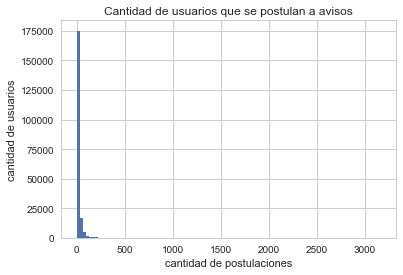

In [41]:
g = postulantes.hist(bins=100)
g.set_title('Cantidad de usuarios que se postulan a avisos')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de usuarios')

Filtramos porque como vemos muy pocos usuarios se han postulado a muchisimos avisos.

Text(0,0.5,'cantidad de usuarios')

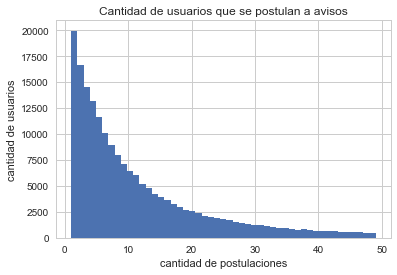

In [42]:
postulantes_filt = postulantes[postulantes.values < 50]
g = postulantes_filt.hist(bins=49)
g.set_title('Cantidad de usuarios que se postulan a avisos')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de usuarios')

In [44]:
pos_por_aviso = postulaciones['idaviso'].value_counts()
pos_por_aviso.describe()

count    12692.000000
mean       268.013158
std        542.269598
min          1.000000
25%         33.000000
50%        100.000000
75%        269.250000
max       9932.000000
Name: idaviso, dtype: float64

Text(0,0.5,'cantidad de avisos')

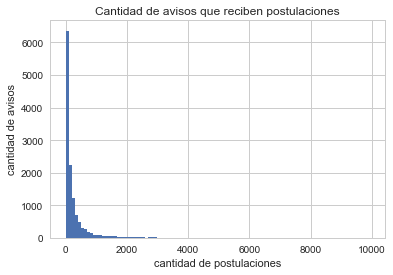

In [45]:
g = pos_por_aviso.hist(bins=100)
g.set_title('Cantidad de avisos que reciben postulaciones')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de avisos')

De igual manera, muy poca cantidad de avisos reciben varios miles de postulaciones más que el resto.

Text(0,0.5,'cantidad de avisos')

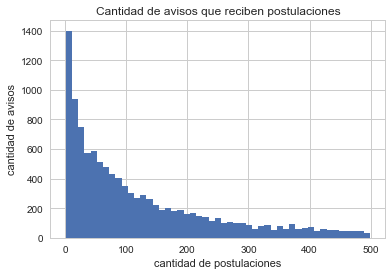

In [46]:
pos_por_aviso_filt = pos_por_aviso[pos_por_aviso.values < 500]
g = pos_por_aviso_filt.hist(bins=49)
g.set_title('Cantidad de avisos que reciben postulaciones')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('cantidad de avisos')

In [47]:
postulaciones['fechapostulacion'].dt.month.value_counts()

2    2125425
1    1276198
Name: fechapostulacion, dtype: int64

Text(0,0.5,'Cantidad de postulaciones')

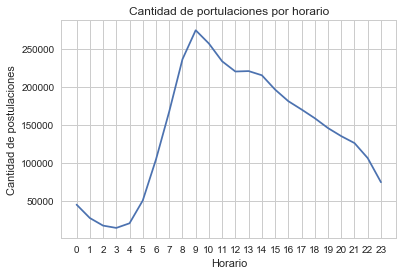

In [48]:
horarios = postulaciones['fechapostulacion'].dt.hour.value_counts().sort_index()
g = horarios.plot(xticks= range(0,24))
g.set_title('Cantidad de portulaciones por horario')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de postulaciones')

[Text(0,0,'Lunes'),
 Text(0,0,'Martes'),
 Text(0,0,'Miercoles'),
 Text(0,0,'Jueves'),
 Text(0,0,'Viernes'),
 Text(0,0,'Sabado'),
 Text(0,0,'Domingo')]

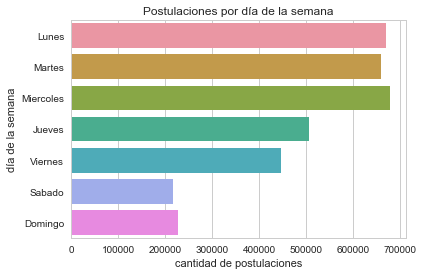

In [49]:
weekdays = postulaciones['fechapostulacion'].map(lambda x: x.weekday())
weekdays_count = weekdays.value_counts()
g = sns.barplot(x= weekdays_count.values, y= weekdays_count.index, orient ='h')
g.set_title('Postulaciones por día de la semana')
g.set_xlabel('cantidad de postulaciones')
g.set_ylabel('día de la semana')
g.set_yticklabels(('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo'))

Text(0,0.5,'Cantidad de postulaciones')

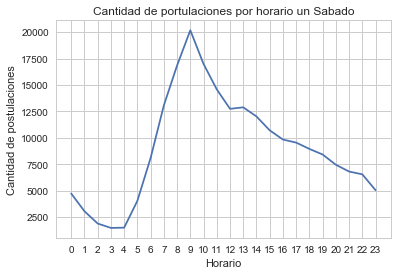

In [50]:
sabados = (weekdays.values == 5)
horarios_sabados = (postulaciones[sabados])['fechapostulacion'].dt.hour.value_counts().sort_index()
g = horarios_sabados.plot(xticks= range(0,24))
g.set_title('Cantidad de portulaciones por horario un Sabado')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de postulaciones')

Como vemos, un día como un sabado responde al mismo patron de postulaciones por horario que el resto de los dias.

Text(0,0.5,'Cantidad de postulaciones')

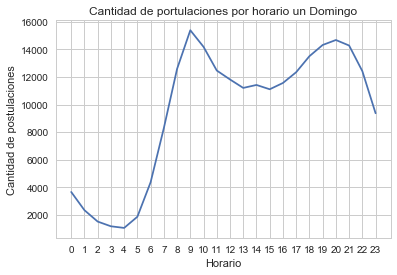

In [51]:
domingos = (weekdays.values == 6)
horarios_domingos = (postulaciones[domingos])['fechapostulacion'].dt.hour.value_counts().sort_index()
g = horarios_domingos.plot(xticks= range(0,24))
g.set_title('Cantidad de portulaciones por horario un Domingo')
g.set_xlabel('Horario')
g.set_ylabel('Cantidad de postulaciones')

Mientras que los domingos tienen un patrón distinto, esperable si consideramos que el estilo de vida de gente varia drasticamente estos dias.

#### avisos_online

In [52]:
avisos_online.head(5)

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [184]:
avisos_online.shape

(5028, 1)

Aquí podemos ver los avisos online al 8 de marzo de 2018

#### avisos_detalle

In [3]:
avisos_detalle.head(5)




,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [4]:
avisos_detalle.shape

(13534, 11)

In [5]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [6]:
#ESTO NO LO USO XQ ME JODE AL USAR LOC
# Columnas que se detecto que son variables categoricas
#avisos_detalle['nombre_zona'] = avisos_detalle['nombre_zona'].astype('category')
#avisos_detalle['tipo_de_trabajo'] = avisos_detalle['tipo_de_trabajo'].astype('category')
#avisos_detalle['nivel_laboral'] = avisos_detalle['nivel_laboral'].astype('category')
#avisos_detalle['nombre_area'] = avisos_detalle['nombre_area'].astype('category')                                                                             

In [26]:
avisos_detalle["nombre_zona"].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

In [37]:
caba=((avisos_detalle.loc[avisos_detalle['nombre_zona'] == "Capital Federal"  ])["nombre_area"]).value_counts().head(5)
gba =((avisos_detalle.loc[avisos_detalle['nombre_zona'] == "Gran Buenos Aires"])["nombre_area"]).value_counts().head(5)

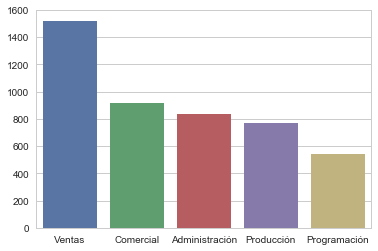

In [42]:
#VEMOS QUE LAS AREAS CON MAS PUBLICACIONES COINCIDEN Y APESAR
#DE QUE LAS CANTIDADES DIFIEREN MUCHO, VIENDO LOS GRAFICOS PODEMOS VER QUE LA RELACION ENTRE
#AREAS ES LA MISMA TANTO PARA CAPITAL COMO PARA GRAN BUENOS AIRES
sns.barplot(y=gba.values, x=gba.index, orient='v')

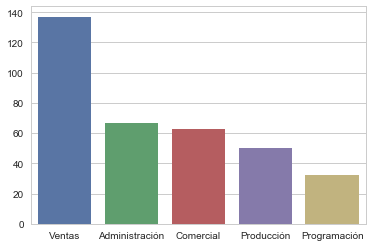

In [43]:
sns.barplot(y=caba.values, x=caba.index, orient='v')

(array([ -500.,     0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.]),
 <a list of 8 Text xticklabel objects>)

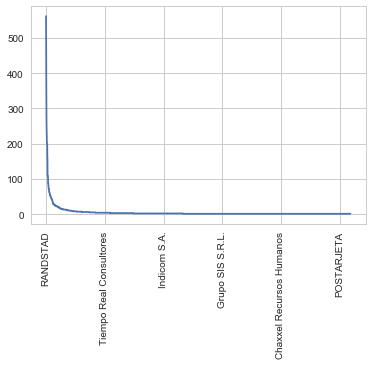

In [62]:
#LA IDEA ES VER QUE LA MAYORIA DE EMPRESAS SOLO TIENEN UN AVISO
avisos_detalle["denominacion_empresa"].value_counts().plot()
plt.xticks(rotation=90)

In [51]:
avisos_detalle.loc[avisos_detalle['denominacion_empresa'] == "RANDSTAD"  ].shape

(562, 11)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

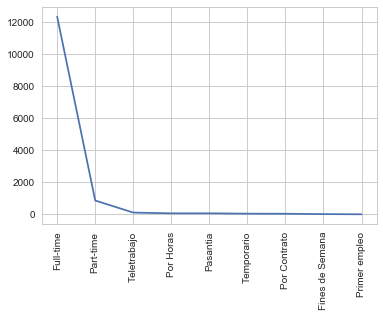

In [61]:
tipo_de_trabajo = avisos_detalle["tipo_de_trabajo"].value_counts().plot()
plt.xticks(rotation=90)

In [59]:
tipo_de_trabajo

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [66]:
avisos_detalle["nivel_laboral"].value_counts()
#ESTO NO TIENE SENTIDO ANALIZARLO XQ NO SON REPRESENTATIVAS LAS CATEGORIAS CON TODAS LAS AREAS
#EJEMPLO UN DOCTOR Senior / Semi-Senior (POSTA QUE HAY CASOS ASI)

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64